# Imports

In [1]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
import csv
import pickle
from sklearn.model_selection import train_test_split

# Input pipeline and preprocessing

## Classifier

### Create classification datasets

For creating the datasets, the training images, test images and test labels have to be downloaded and extracted. They should be saved in the `data` directory, with a structure like this:

```plaintext
data/
    Training/
        00000/
            ...
        00001/
            ...
    Test/
        00000.ppm
        ...
        GT-final_test.csv
```    

In [2]:
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath, is_test=False):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    
    if not is_test:
        images = [] # images
        labels = [] # corresponding labels
        # loop over all 42 classes
        for c in range(0,43):
            prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
            gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
            gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
            next(gtReader) # skip header
            # loop over all images in current annotations file
            for row in gtReader:
                images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
                # TODO: Add not only the label but also the location of the bounding box
                labels.append(row[7]) # the 8th column is the label
            gtFile.close()
        return images, labels
    
    if is_test:
        # test images are not in seperate directories and have one annotation file with all annotations
        images = [] # images
        labels = []
        prefix = rootpath + '/'
        gtFile = open(prefix + 'GT-final_test.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';')
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            # TODO: Add not only the label but also the location of the bounding box
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
        return images, labels

X, y = readTrafficSigns('./data/Training')
X_test, y_test = readTrafficSigns('./data/Test', is_test=True)

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=21)

# Dictionaries erstellen
train = {'features': X_train, 'labels': y_train}
val = {'features': X_val, 'labels': y_val}
test  = {'features': X_test,  'labels': y_test}

# Speichern
with open('./data/classifier_train.pkl', 'wb') as f:
    pickle.dump(train, f)
with open('./data/classifier_valid.pkl', 'wb') as f:
    pickle.dump(val, f)
with open('./data/classifier_test.pkl', 'wb') as f:
    pickle.dump(test, f)

### Visualization

In [3]:
training_file   = './data/classifier_train.pkl'
validation_file = './data/classifier_valid.pkl'
testing_file    = './data/classifier_test.pkl'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels'] # training dataset
X_valid, y_valid = valid['features'], valid['labels'] # validation dataset used in training phase
X_test, y_test   = test['features'], test['labels']   # test dataset
n_classes        = len(np.unique(y_train))

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
#assert(len(X_test) == len(y_test))

print()
print("Image Shape    : {}".format(X_train[0].shape))
print()
print("Training Set   : {} samples".format(len(X_train)))
print("Validation Set : {} samples".format(len(X_valid)))
print("Test Set       : {} samples".format(len(X_test)))
print('n_classes      : {}'.format(n_classes))
X_train[0].shape
#X_train.shape


Image Shape    : (46, 50, 3)

Training Set   : 35288 samples
Validation Set : 3921 samples
Test Set       : 12630 samples
n_classes      : 43


(46, 50, 3)

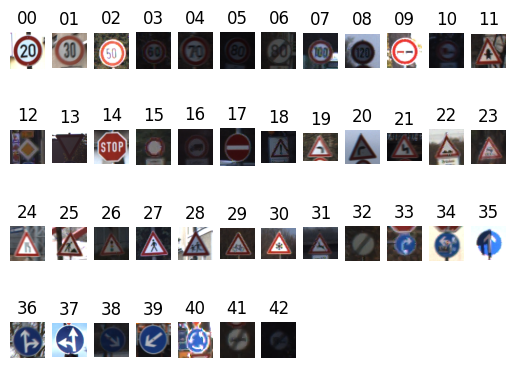

In [4]:
import matplotlib.pyplot as plot
%matplotlib inline
rows, cols   = 4, 12
fig, axes    = plot.subplots(rows, cols)
for idx, ax in enumerate(axes.ravel()):
    if idx < n_classes :
        # get X_train of the current class
        X_train_of_class = [X_train[i] for i in range(len(X_train)) if y_train[i] == str(idx)]
        # show a random image of the current class
        X_train_0       = X_train_of_class[np.random.randint(len(X_train_of_class))]
        ax.imshow(X_train_0)
        ax.set_title('{:02d}'.format(idx))
        ax.axis('off')
        plot.setp(ax.get_xticklabels(), visible=False)
        plot.setp(ax.get_yticklabels(), visible=False)
    else:
        ax.axis('off')
#
plot.draw()
fig.savefig('figures/' + 'sample_representative' + '.jpg', dpi=700)

## Object detection

### Remove all but priority and stop signs

In [ ]:
# stop sign: 14
# other stopping signs: 15, 17
# priority signs: 11, 12, 13

# ...

### Add bounding boxes to labels for object detection

In [ ]:
# ...

# Training

In [ ]:
# ...

# Evaluation

In [ ]:
# ...